In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Set plot params
plt.rcParams['figure.figsize'] = [10,8]
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

#### Multi dimension heat equation

In [4]:
def Euler(y0, f, dx, dy):
    rhs = f(y0, nx, ny, dx, dy)
    y = y0 + dt*rhs

    return y

In [6]:
def heateq2D(T, nx, ny, dx, dy):
    alpha = 1
    dudt = np.zeros_like(T)
    nxm = nx-1; nxp = nx+1
    nym = ny-1; nyp = ny+1

    # central difference
    for i in range(1, nx):
        dudt[i, 1:ny] = (T[i, 0:nym] - 2*T[i, 1:ny] + T[i, 2:nyp])/dy**2
    for j in range(1, ny):
        dudt[1:nx, j] += (T[0:nxm, j] - 2*T[1:nx, j] + T[2:nxp, j])/dx**2
    
    return dudt


In [7]:
x0, xmax, nx = 0, 1, 64
y0, ymax, ny = 0, 1, 64

t0 = 0
dt =0.00006
nt = 2500

alpha = 1.0

x = np.linspace(x0, xmax, nx+1)
y = np.linspace(y0, ymax, ny+1)

dx = (xmax-x0)/nx
dy = (ymax-y0)/ny

T = np.zeros((nx+1, ny+1))

# initial condition
for i in range(1, nx):
    T[i,:] = np.sin(np.pi*x[i]) * np.sin(np.pi*y[:])

#boundary condition
T[0,:] = 0
T[nx, :] = 0
T[:, 0] = 0
T[:, ny] = 0

for t in range(nt):
    time = t0 + (t+1)*dt
    T = Euler(T, heateq2D, dx, dy)

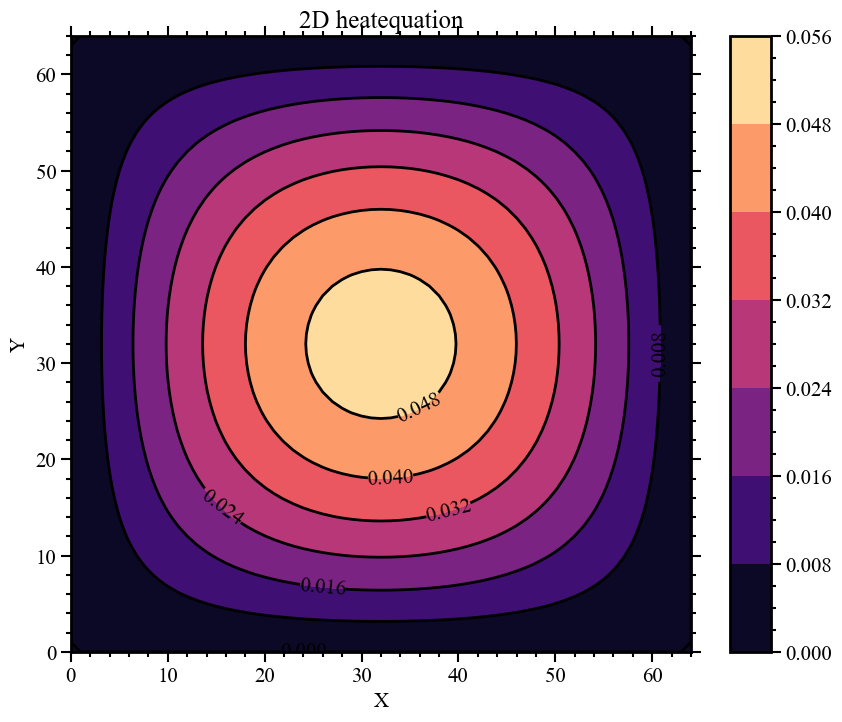

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure()
cont = plt.contourf(T, cmap='magma')
plt.xlabel('X')
plt.ylabel('Y')
cs=plt.contour(T,colors='k')
# 등고선 표현
plt.clabel(cs)
plt.title('2D heatequation')
fig.colorbar(cont, shrink=1, aspect=15)

plt.show()